Kaggle에서 데이터셋 받기

1. train test 데이터 나눠놓기

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"narongkim","key":"57c1a676139900d7de905ec9b299b7d5"}'}

In [ ]:
!ls -al
!mkdir -p ~/.kaggle
!ls -al ~/

total 20
drwxr-xr-x 1 root root 4096 Dec  2 07:31 .
drwxr-xr-x 1 root root 4096 Dec  2 07:30 ..
drwxr-xr-x 4 root root 4096 Nov 23 14:31 .config
-rw-r--r-- 1 root root   65 Dec  2 07:31 kaggle.json
drwxr-xr-x 1 root root 4096 Nov 23 14:31 sample_data
total 64
drwx------ 1 root root 4096 Dec  2 07:31 .
drwxr-xr-x 1 root root 4096 Dec  2 07:30 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Nov 28 14:23 .cache
drwx------ 4 root root 4096 Nov 28 14:22 .config
drwxr-xr-x 5 root root 4096 Nov 28 14:22 .ipython
drwx------ 2 root root 4096 Nov 28 14:22 .jupyter
drwxr-xr-x 2 root root 4096 Dec  2 07:31 .kaggle
drwxr-xr-x 2 root root 4096 Nov 23 14:42 .keras
drwxr-xr-x 1 root root 4096 Nov 28 14:22 .local
drwxr-xr-x 4 root root 4096 Nov 28 14:22 .npm
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf
-rw-r--r-- 1 root root  165 Nov 28 14:22 .wget-hsts


In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls -al ~/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 Dec  2 07:31 .
drwx------ 1 root root 4096 Dec  2 07:31 ..
-rw------- 1 root root   65 Dec  2 07:31 kaggle.json


In [ ]:
!kaggle datasets download -d anujsingh098/top-1000-imdb-movies

  0% 0.00/171k [00:00<?, ?B/s]
100% 171k/171k [00:00<00:00, 53.6MB/s]


In [ ]:
!unzip top-1000-imdb-movies.zip
!ls

Archive:  top-1000-imdb-movies.zip
  inflating: imdb_top_1000.csv       
imdb_top_1000.csv  kaggle.json	sample_data  top-1000-imdb-movies.zip


CLIP 준비 - https://github.com/openai/CLIP

In [ ]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-6r9_50q6
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-6r9_50q6
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369408 sha256=e8cba1089b5881b159ca1a162189b427e500754d38caf01dcbf8248a0cf51d98
  Stored in directory: /tmp/pip-ephem-wheel-cache-0nubhg3i/wheels/ab/4f/3a/5e51521b55997aa6f0690e095c08824219753128ce8d9969a3
Successfully built clip


In [ ]:
import numpy as np
import torch
from pkg_resources import packaging

print("Torch version:", torch.__version__)

Torch version: 1.12.1+cu113


In [ ]:
import clip

clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [ ]:
model, preprocess = clip.load("ViT-B/32")
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

100%|███████████████████████████████████████| 338M/338M [00:11<00:00, 29.9MiB/s]


Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


Image Preprocessing 과정
- resize image, center-crop, normalize the pixel intensity using dataset mean and standard deviation.

In [ ]:
preprocess

Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    <function _convert_image_to_rgb at 0x7fdd009c10d0>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

Text Preprocessing
CLIP모델이 원하는 padded to 77 tokens long으로 preprocessing

In [ ]:
clip.tokenize("Hello World!")

tensor([[49406,  3306,  1002,   256, 49407,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]], dtype=torch.int32)

Setting up input images and texts

장르명 밖에 없으므로 어쩔수 없이 description은 빼야할 듯 
추후에 영화 스토리 + 장르명으로 확장시킬 수는 있을 듯.

In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import OrderedDict
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

먼저 small data로 테스트 해보고, 후에 전체 데이터로 학습

pandas로 csv가져오고, 해당 이미지 url다운받기




In [ ]:
import pandas as pd
movies = pd.read_csv('//content/imdb_top_1000.csv') # , encoding="ISO-8859-1")
movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,Crime,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,Crime,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [ ]:
# image download

import urllib.request

import os

os.mkdir("/content/images")  # 폴더 생성

not_found = []

def downImage(img_url, img_name):
  try :
    dir = '/content/images/'
    urllib.request.urlretrieve(img_url, dir + str(img_name) + '.jpg')
  except : 
    print(img_url, img_name)
    not_found.append(img_name)

for idx in movies.index:
  img_url = movies.loc[idx, 'Poster_Link']
  img_name = idx
  downImage(img_url, img_name)

not_found

https://m.media-amazon.com/images/M/MV5BNzVlY2MwMjktM2E4OS00Y2Y3LWE3ZjctYzhkZGM3YzA1ZWM2XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UX67_CR0,0,67,98_AL_.jpg 29
https://m.media-amazon.com/images/M/MV5BZGI5MjBmYzYtMzJhZi00NGI1LTk3MzItYjBjMzcxM2U3MDdiXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UX67_CR0,0,67,98_AL_.jpg 48
https://m.media-amazon.com/images/M/MV5BMmQ2MmU3NzktZjAxOC00ZDZhLTk4YzEtMDMyMzcxY2IwMDAyXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UX67_CR0,0,67,98_AL_.jpg 75
https://m.media-amazon.com/images/M/MV5BNWM1NmYyM2ItMTFhNy00NDU0LThlYWUtYjQyYTJmOTY0ZmM0XkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_UX67_CR0,0,67,98_AL_.jpg 115
https://m.media-amazon.com/images/M/MV5BMTU3ODg2NjQ5NF5BMl5BanBnXkFtZTcwMDEwODgzMQ@@._V1_UX67_CR0,0,67,98_AL_.jpg 150
https://m.media-amazon.com/images/M/MV5BNGIyMWRlYTctMWNlMi00ZGIzLThjOTgtZjQzZjRjNmRhMDdlXkEyXkFqcGdeQXVyMTAwMzUyOTc@._V1_UX67_CR0,0,67,98_AL_.jpg 175
https://m.media-amazon.com/images/M/MV5BZjJhMThkNTQtNjkxNy00MDdjLTg4MWQtMTI2MmQ3MDVmODUzXkEyXkFqcGdeQXVyMTAwOTA3NzY3._V1_UY98_CR1,0,67,

[29,
 48,
 75,
 115,
 150,
 175,
 246,
 257,
 283,
 298,
 391,
 421,
 425,
 428,
 431,
 480,
 546,
 648,
 650,
 676,
 689,
 697,
 709,
 712,
 789,
 810,
 839,
 859,
 929,
 961,
 985,
 989]

In [ ]:
# 이미지 없는 row 삭제
movies = movies.drop(not_found)

In [ ]:
sample_index = [
    0,
    1,
    2,
    7,
    9,
    14,
    21,
]

In [ ]:
sample_movies_raw = movies.loc[sample_index, :]
sample_movies_raw

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,Biography,8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102
14,https://m.media-amazon.com/images/M/MV5BNzQzOT...,The Matrix,1999,A,136 min,Action,8.7,When a beautiful stranger leads computer hacke...,73.0,Lana Wachowski,Lilly Wachowski,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,1676426,171479930
21,https://m.media-amazon.com/images/M/MV5BZjdkOT...,Interstellar,2014,UA,169 min,Adventure,8.6,A team of explorers travel through a wormhole ...,74.0,Christopher Nolan,Matthew McConaughey,Anne Hathaway,Jessica Chastain,Mackenzie Foy,1512360,188020017


In [ ]:
# 쓸 column만 남겨놓기
sample_movies = sample_movies_raw[['Series_Title', 'Genre']]
sample_movies

,Series_Title,Genre
0,The Shawshank Redemption,Drama
1,The Godfather,Crime
2,The Dark Knight,Action
7,Schindler's List,Biography
9,Fight Club,Drama
14,The Matrix,Action
21,Interstellar,Adventure


In [ ]:
# # glob으로 이미지 리스트 관리
# image_path = '/content/samplemovieposters/SampleMoviePosters/'
# image_array = []

# for i in sample_movies['imdbId']:
#   file = image_path + str(i) + '.jpg'
#   img = Image.open(file)
#   np_img = np.array(img)
#   image_array.append(np_img)

# # image_array


In [ ]:
id_genre_dict = {}
for idx in sample_movies.index:
  movie_id = idx
  gen_split = sample_movies.loc[idx, 'Genre']
  id_genre_dict.update({movie_id : gen_split})

id_genre_dict

{0: 'Drama',
 1: 'Crime',
 2: 'Action',
 7: 'Biography',
 9: 'Drama',
 14: 'Action',
 21: 'Adventure'}

In [ ]:
genres = sample_movies['Genre'].unique()
genres

array(['Drama', 'Crime', 'Action', 'Biography', 'Adventure'], dtype=object)

## 이미지

In [ ]:
plt.figure(figsize=(16,5))

image_path = '/content/images/'
original_images = []
images = []
texts = []

for i in sample_movies.index:
  file = image_path + str(i) + '.jpg'
  image = Image.open(file).convert('RGB')

  plt.subplot(2, 4, len(images)+1)
  plt.imshow(image)
  plt.title(f"{i}\n{id_genre_dict[i]}")
  plt.xticks([])
  plt.yticks([])

  original_images.append(image)
  images.append(preprocess(image))
  texts.append(id_genre_dict[i])

plt.tight_layout()

NameError: ignored

# Building features

In [ ]:
image_input = torch.tensor(np.stack(images))

text_tokens = clip.tokenize("Its Genre is" + gen for gen in texts)

In [ ]:
with torch.no_grad():
  image_features = model.encode_image(image_input).float()
  text_features = model.encode_text(text_tokens).float()

# Calculating cosine similarity

In [ ]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

Text(0.5, 1.0, 'Cosine similarity between text and image features')

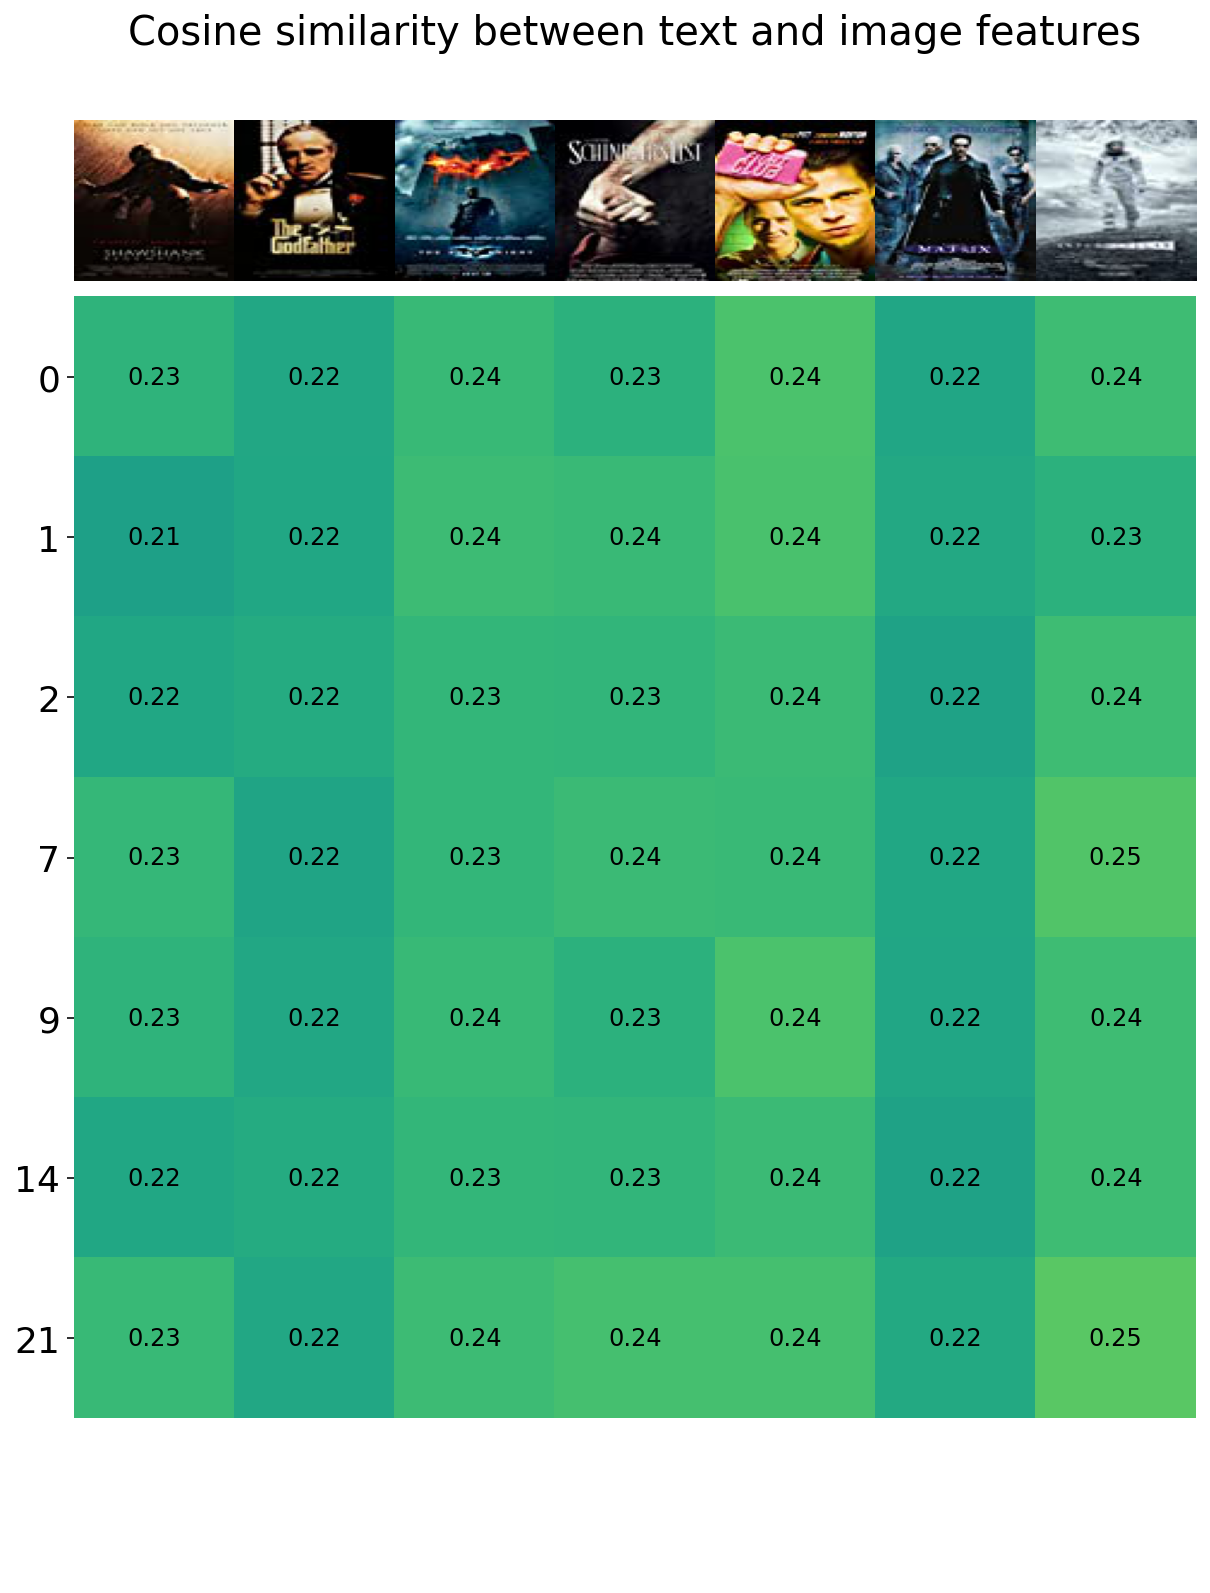

In [ ]:
count = len(id_genre_dict)

plt.figure(figsize=(20, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
# plt.colorbar()
plt.yticks(range(count), id_genre_dict, fontsize=18)
plt.xticks([])
for i, image in enumerate(original_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between text and image features", size=20)

결과가 뚜렷하게 나오지 않는다 .... 적합하지 않아서 그런가?

# Zero-Shot Image Classification

In [ ]:
full_genres = movies['Genre'].unique()
full_genres

array(['Drama', 'Crime', 'Action', 'Biography', 'Western', 'Comedy',
       'Adventure', 'Animation', 'Horror', 'Mystery', 'Film-Noir',
       'Fantasy', 'Family', 'Thriller'], dtype=object)

In [ ]:
text_tokens = clip.tokenize("Its Genre is" + gen for gen in full_genres)

In [ ]:
with torch.no_grad():
    text_features = model.encode_text(text_tokens).float()
    text_features /= text_features.norm(dim=-1, keepdim=True)

text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
top_probs, top_labels = text_probs.cpu().topk(5, dim=-1)

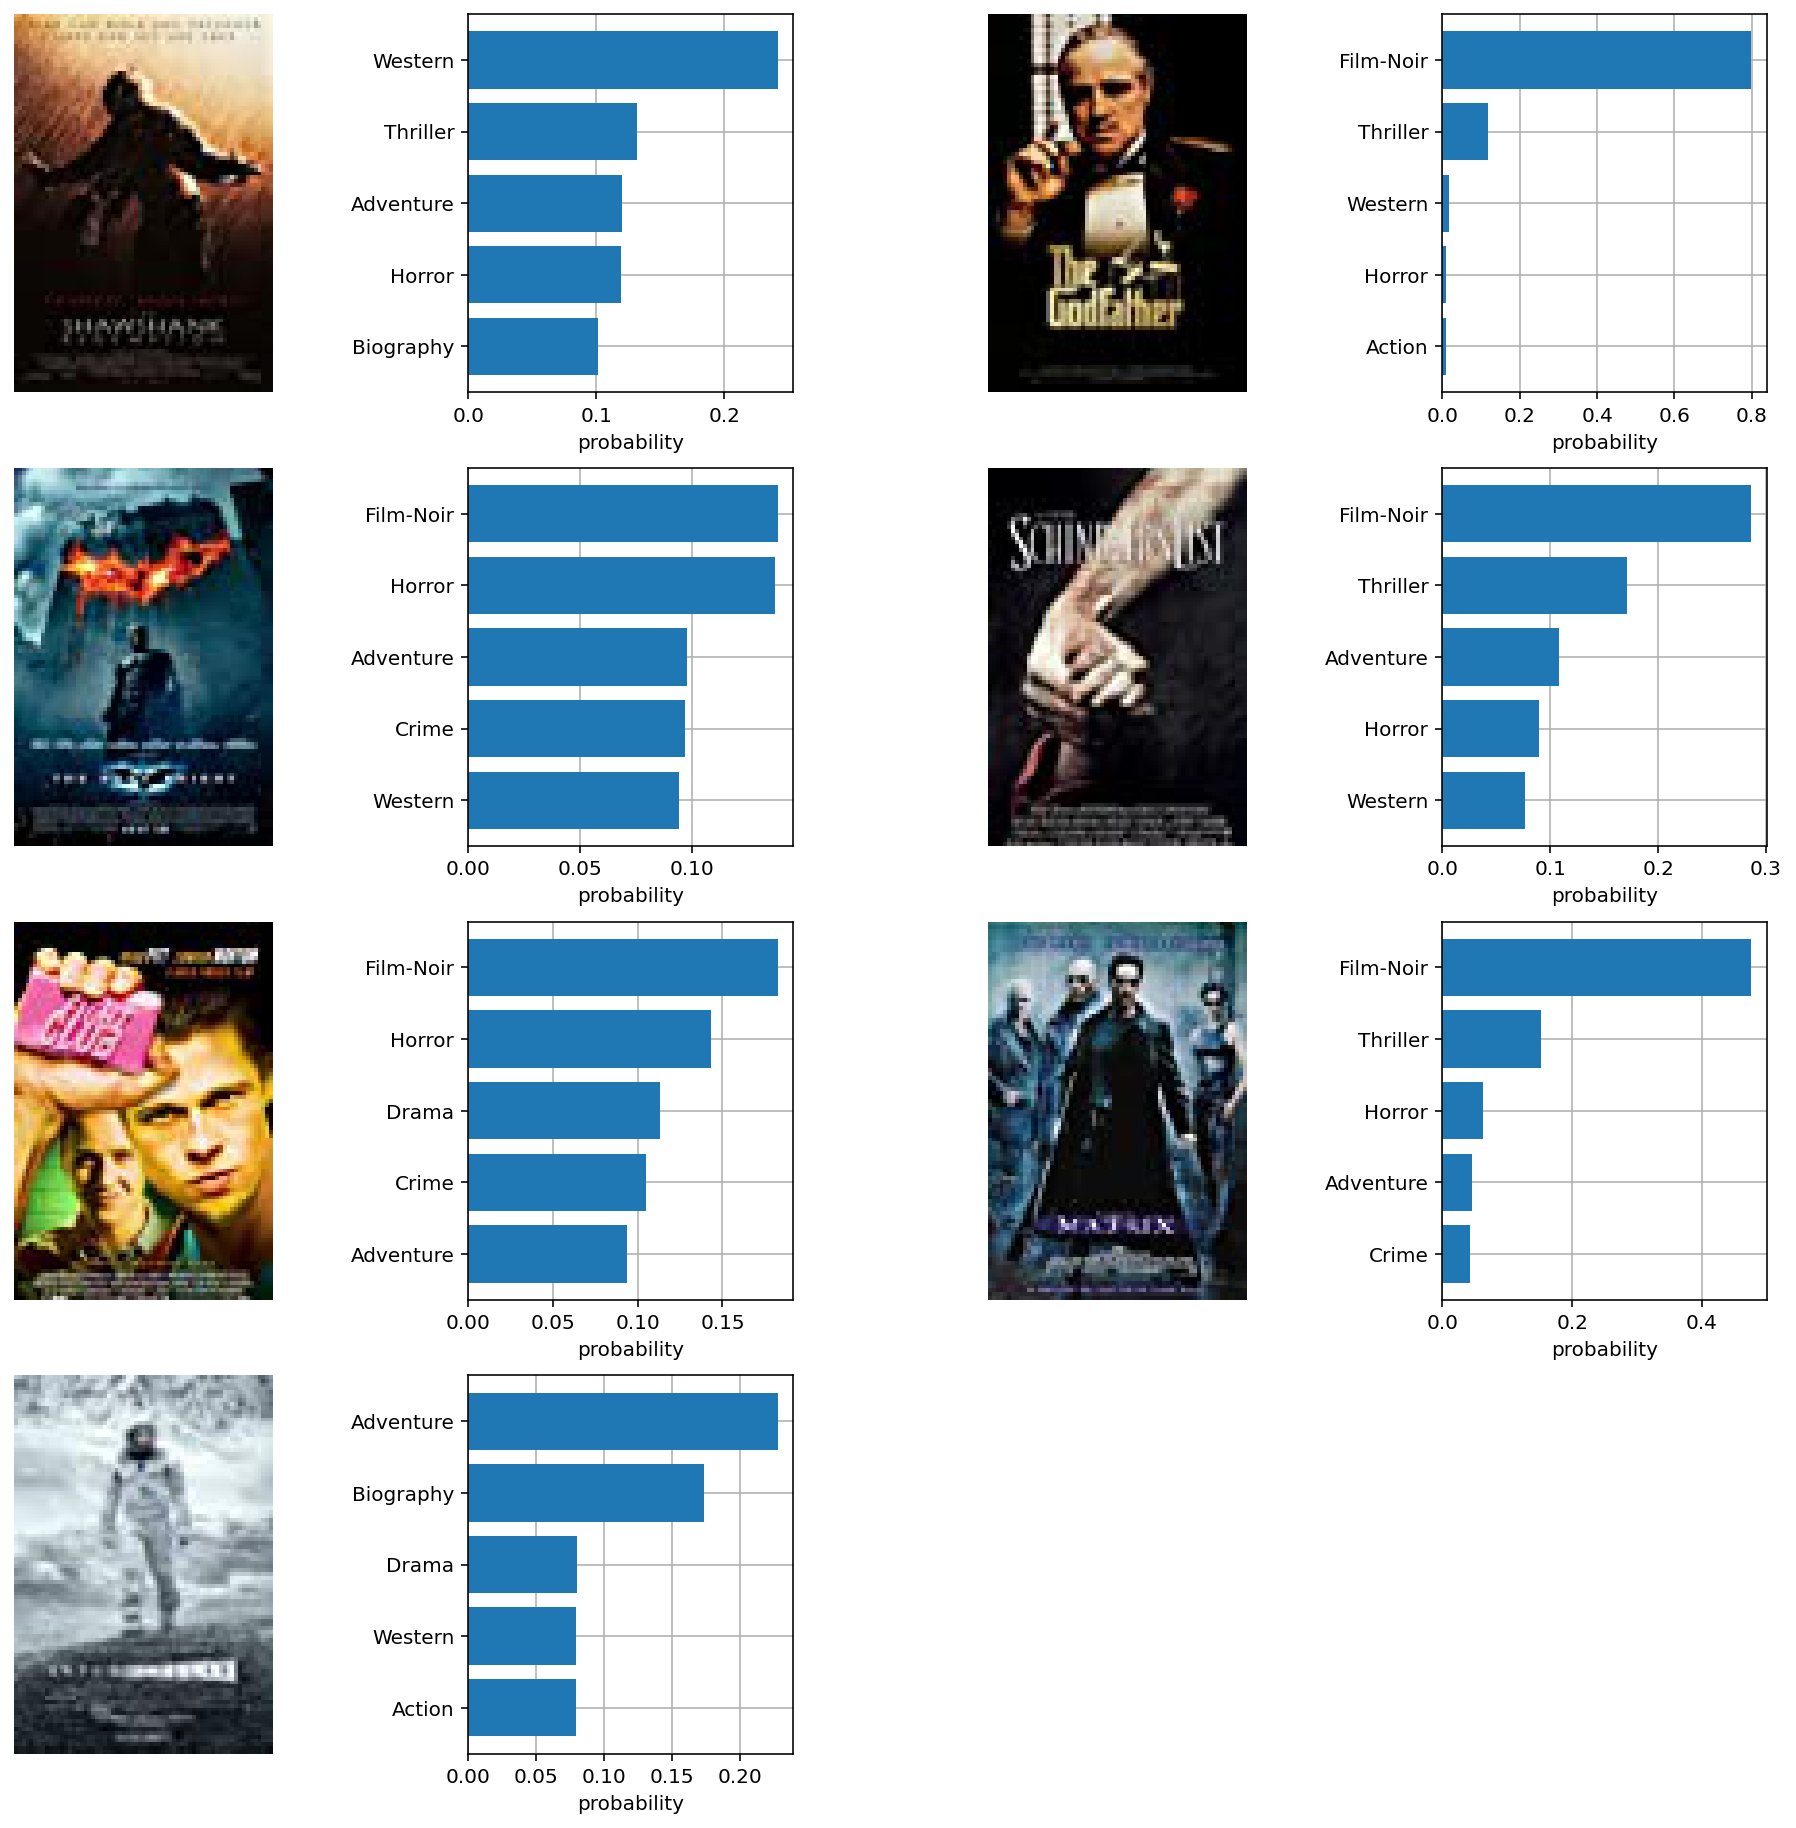

In [ ]:
plt.figure(figsize=(16, 16))

for i, image in enumerate(original_images):
    plt.subplot(4, 4, 2 * i + 1)
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(4, 4, 2 * i + 2)
    y = np.arange(top_probs.shape[-1])
    plt.grid()
    plt.barh(y, top_probs[i])
    plt.gca().invert_yaxis()
    plt.gca().set_axisbelow(True)
    plt.yticks(y, [full_genres[index] for index in top_labels[i].numpy()])
    plt.xlabel("probability")

plt.subplots_adjust(wspace=0.5)
plt.show()

결과가 나오긴 하는거 같으니 .. train 이랑 test 데이터 나눠서 해보자

In [ ]:
movies_data = movies[['Series_Title', 'Genre']]
movies_data.head()

,Series_Title,Genre
0,The Shawshank Redemption,Drama
1,The Godfather,Crime
2,The Dark Knight,Action
3,The Godfather: Part II,Crime
4,12 Angry Men,Crime


In [ ]:
# permutation을 이용해
# index와 이미지 이름이 일치하므로 y는 굳이 나눌 필요 없을 것 같음
def permutation_train_test_split(X,test_size=0.2, shuffle=True, random_state=1004):
    test_num = int(X.shape[0] * test_size)
    train_num = X.shape[0] - test_num
    if shuffle:
        np.random.seed(random_state)
        shuffled = np.random.permutation(X.shape[0])
        X = X.iloc[shuffled,:]
        
        X_train = X[:train_num]
        X_test = X[train_num:]
    else:
        X_train = X[:train_num]
        X_test = X[train_num:]
    return X_train, X_test

In [ ]:
train_set, test_set = permutation_train_test_split(movies_data)

train_set

,Series_Title,Genre
943,28 Days Later...,Drama
971,Omohide poro poro,Animation
624,Mr. Nobody,Drama
998,Lifeboat,Drama
397,Bound by Honor,Crime
...,...,...
258,Dilwale Dulhania Le Jayenge,Drama
996,Giant,Drama
488,District 9,Action
117,The Apartment,Comedy


In [ ]:
test_set

,Series_Title,Genre
482,Edge of Tomorrow,Action
668,La double vie de Véronique,Drama
582,Rogue One,Action
181,Yôjinbô,Action
79,Witness for the Prosecution,Crime
...,...,...
245,"Monsters, Inc.",Animation
335,Special Chabbis,Crime
32,It's a Wonderful Life,Drama
539,Le charme discret de la bourgeoisie,Comedy


In [ ]:
image_path = '/content/images/'
original_images = []
images = []
texts = []

for i in train_set.index:
  file = image_path + str(i) + '.jpg'
  image = Image.open(file).convert('RGB')
  text = str(train_set.loc[i, 'Genre'])
  original_images.append(image)
  images.append(preprocess(image))
  texts.append(text)

texts

['Drama',
 'Animation',
 'Drama',
 'Drama',
 'Crime',
 'Biography',
 'Action',
 'Action',
 'Film-Noir',
 'Drama',
 'Animation',
 'Crime',
 'Comedy',
 'Action',
 'Comedy',
 'Biography',
 'Drama',
 'Biography',
 'Crime',
 'Comedy',
 'Action',
 'Action',
 'Animation',
 'Animation',
 'Adventure',
 'Comedy',
 'Animation',
 'Action',
 'Drama',
 'Comedy',
 'Action',
 'Drama',
 'Drama',
 'Comedy',
 'Adventure',
 'Comedy',
 'Comedy',
 'Animation',
 'Comedy',
 'Comedy',
 'Animation',
 'Action',
 'Action',
 'Comedy',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Crime',
 'Comedy',
 'Biography',
 'Drama',
 'Adventure',
 'Drama',
 'Comedy',
 'Comedy',
 'Crime',
 'Drama',
 'Biography',
 'Animation',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Biography',
 'Drama',
 'Action',
 'Drama',
 'Action',
 'Biography',
 'Drama',
 'Drama',
 'Drama',
 'Adventure',
 'Action',
 'Adventure',
 'Drama',
 'Animation',
 'Drama',
 'Adventure',
 'Action',
 'Drama',
 'Action',
 'Adventure',
 'Drama',
 'Drama',
 'Drama',
 'Drama

In [ ]:
image_input = torch.tensor(np.stack(images))
text_tokens = clip.tokenize("Its Genre is" + gen for gen in texts)

In [ ]:
with torch.no_grad():
  image_features = model.encode_image(image_input).float()
  text_features = model.encode_text(text_tokens).float()

In [ ]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

# 학습 완료?

In [ ]:
#zero shot 해보기
full_genres

array(['Drama', 'Crime', 'Action', 'Biography', 'Western', 'Comedy',
       'Adventure', 'Animation', 'Horror', 'Mystery', 'Film-Noir',
       'Fantasy', 'Family', 'Thriller'], dtype=object)

In [ ]:
total_genres = [
    'Sci-Fi',
    'Sports',
    'War',
    'Melodramas',
    'Musicals',
    'Romance',
    'Gangster',
    'Period',
    'Disaster',
    'Superhero',
]
total_genres.extend(full_genres)

total_genres

['Sci-Fi',
 'Sports',
 'War',
 'Melodramas',
 'Musicals',
 'Romance',
 'Gangster',
 'Period',
 'Disaster',
 'Superhero',
 'Drama',
 'Crime',
 'Action',
 'Biography',
 'Western',
 'Comedy',
 'Adventure',
 'Animation',
 'Horror',
 'Mystery',
 'Film-Noir',
 'Fantasy',
 'Family',
 'Thriller']

In [ ]:
text_tokens = clip.tokenize("Its Genre is" + gen for gen in total_genres)

with torch.no_grad():
    text_features = model.encode_text(text_tokens).float()
    text_features /= text_features.norm(dim=-1, keepdim=True)

text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
top_probs, top_labels = text_probs.cpu().topk(5, dim=-1)

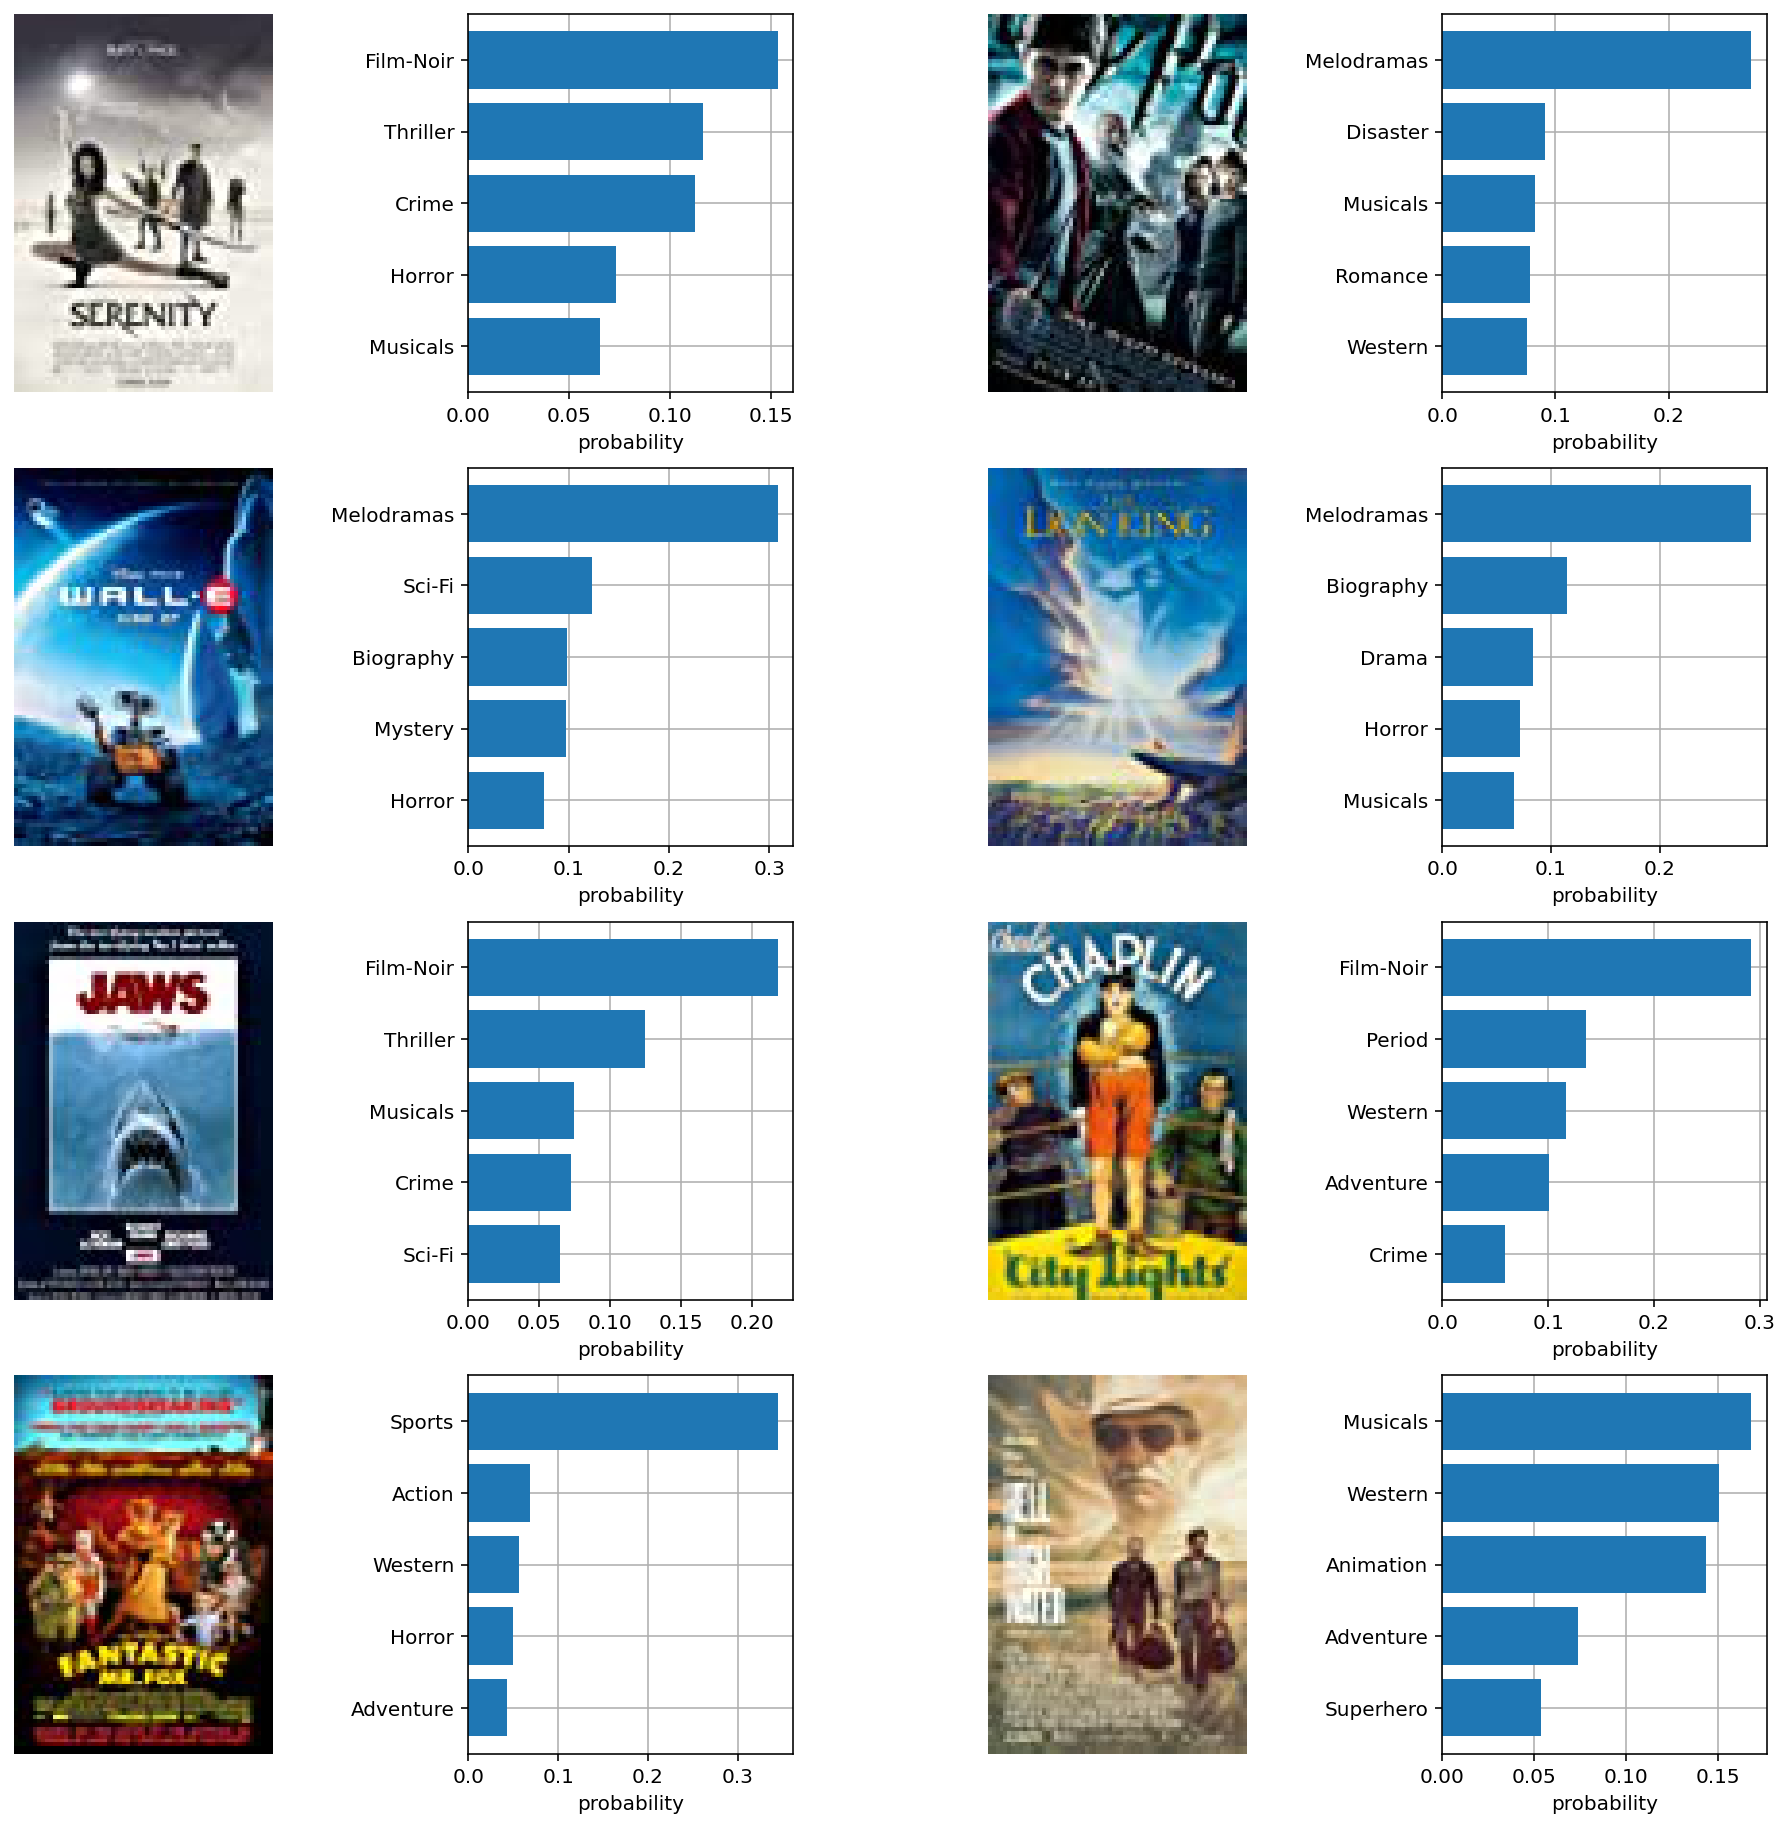

In [ ]:
plt.figure(figsize=(16, 16))
for i, image in enumerate(original_images[20:28]):
    plt.subplot(4, 4, 2 * i + 1)
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(4, 4, 2 * i + 2)
    y = np.arange(top_probs.shape[-1])
    plt.grid()
    plt.barh(y, top_probs[i])
    plt.gca().invert_yaxis()
    plt.gca().set_axisbelow(True)
    plt.yticks(y, [ total_genres[index] for index in top_labels[i].numpy()])
    plt.xlabel("probability")

plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
texts

['Drama',
 'Animation',
 'Drama',
 'Drama',
 'Crime',
 'Biography',
 'Action',
 'Action',
 'Film-Noir',
 'Drama',
 'Animation',
 'Crime',
 'Comedy',
 'Action',
 'Comedy',
 'Biography',
 'Drama',
 'Biography',
 'Crime',
 'Comedy',
 'Action',
 'Action',
 'Animation',
 'Animation',
 'Adventure',
 'Comedy',
 'Animation',
 'Action',
 'Drama',
 'Comedy',
 'Action',
 'Drama',
 'Drama',
 'Comedy',
 'Adventure',
 'Comedy',
 'Comedy',
 'Animation',
 'Comedy',
 'Comedy',
 'Animation',
 'Action',
 'Action',
 'Comedy',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Crime',
 'Comedy',
 'Biography',
 'Drama',
 'Adventure',
 'Drama',
 'Comedy',
 'Comedy',
 'Crime',
 'Drama',
 'Biography',
 'Animation',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Biography',
 'Drama',
 'Action',
 'Drama',
 'Action',
 'Biography',
 'Drama',
 'Drama',
 'Drama',
 'Adventure',
 'Action',
 'Adventure',
 'Drama',
 'Animation',
 'Drama',
 'Adventure',
 'Action',
 'Drama',
 'Action',
 'Adventure',
 'Drama',
 'Drama',
 'Drama',
 'Drama

In [ ]:
# accuracy 계산
def evaluate_accuracy():
  acc_sum = 0.0
  n = len(text_probs)
  for i, x in enumerate(text_probs.numpy()):
    for index, v in enumerate(text_probs[i].numpy()):
      if texts[i] == total_genres[index]:
        acc_sum += text_probs[i][index]
        break;
  
  return acc_sum / n

print(evaluate_accuracy())

tensor(0.0506)


In [ ]:
# from torch.utils.data import DataLoader

# batch_size = 256
# num_workers = 0

# train_iter = DataLoader(mnist_train, batch_size, shuffle = True, num_workers = num_workers)
# test_iter = DataLoader(mnist_test, batch_size, shuffle = True, num_workers = num_workers)

In [ ]:
# def softmax(X):
#   X_exp = torch.exp(X)
#   partition = torch.sum(X_exp, dim= 1, keepdim= True)
#   return X_exp / partition

# def net(X):
#   return softmax(torch. matmul(X.reshape((-1, num_inputs)), W) + b)

# def cross_entropy(y_hat, y):
#   return -torch.gather(y_hat, 1, y.unsqueeze(dim=1)).log()

# def accuracy(y_hat, y):
#   return (y_hat.argmax(dim=1) == y).float().mean().item()

# def evaluate_accuracy(data_iter, net):
#   acc_sum, n = 0.0, 0
#   for X, y in data_iter:
#     acc_sum += (net()x)